In [1]:
import numpy as np

from matplotlib import pyplot as plt

cmap = plt.get_cmap('tab20')

figdir = '../../figure/potential'

os.makedirs(figdir, exist_ok=True)

In [2]:
λ_lat = 1064e-9
k_lat = 2*np.pi / λ_lat

w_0_lat = 150e-6
z_R_lat = np.pi * w_0_lat**2 / λ_lat
z_R_lat

0.06643405517459618

In [3]:
λ_per = 532e-9
k_per = 2*np.pi / λ_per

w_0_per = 1e-6
z_R_per = np.pi * w_0_per**2 / λ_per
z_R_per

5.905249348852994e-06

In [20]:
N = 101

V_0_lat = -10
V_0_bar = +10
V_0_box = -20

a_0 = λ_lat / 2

L = N*a_0 / 2

z = -L + 2*L*np.linspace(0, 1, 2000)

V_lat = V_0_lat * np.cos(k_lat*z)**2


z_bar = 10 * a_0

V_bar1 = V_0_bar * np.exp(-2 * ((z - z_bar) / w_0_per)**2)
V_bar2 = V_0_bar * np.exp(-2 * ((z + z_bar) / w_0_per)**2)
V_bar = (V_bar1 + V_bar2) / 2

V_box1 = V_0_box * np.exp(-2 * ((z - 2*a_0) / w_0_per)**2)
V_box2 = V_0_box * np.exp(-2 * (z / w_0_per)**2)
V_box3 = V_0_box * np.exp(-2 * ((z + 2*a_0) / w_0_per)**2)
V_box = (V_box1 + V_box2 + V_box3) / 3

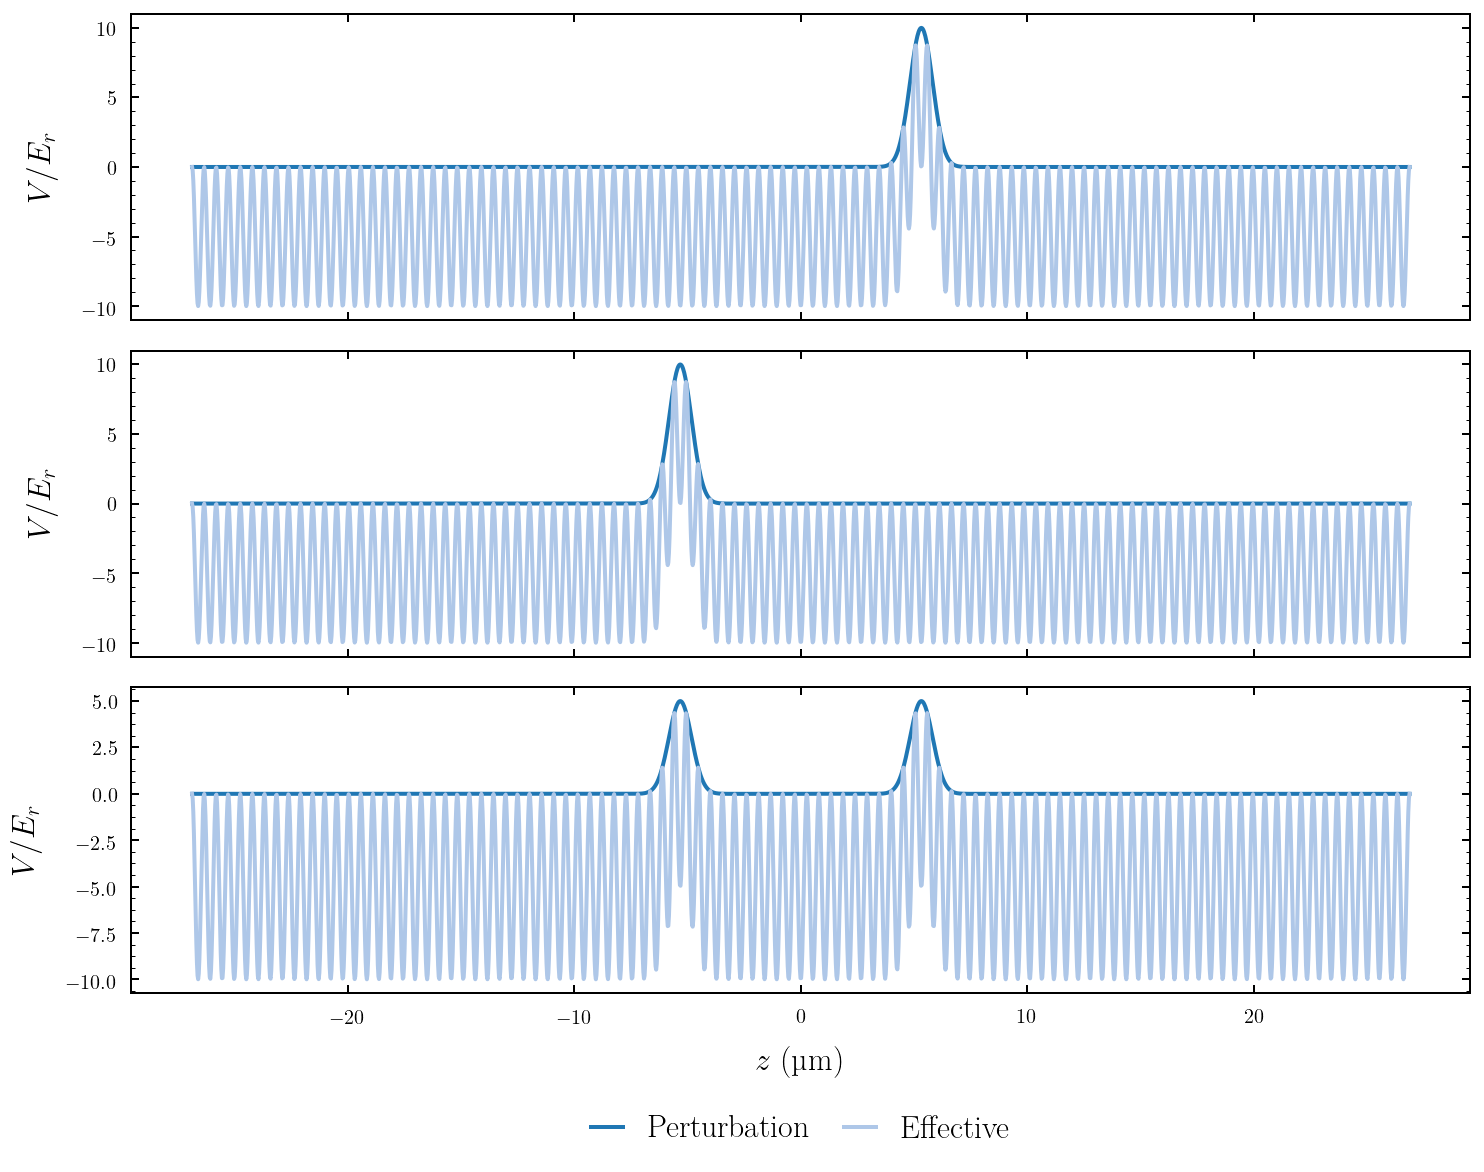

In [23]:
fig, axes = plt.subplots(nrows=3, figsize=(12, 8), sharex=True)

axes[0].plot(z / 1e-6, V_bar1, label='Perturbation', color=cmap.colors[0])
axes[0].plot(z / 1e-6, V_lat + V_bar1, label='Effective', color=cmap.colors[1])
axes[0].set_ylabel('$V/E_r$')

axes[1].plot(z / 1e-6, V_bar2, label='Perturbation', color=cmap.colors[0])
axes[1].plot(z / 1e-6, V_lat + V_bar2, label='Effective', color=cmap.colors[1])
axes[1].set_ylabel('$V/E_r$')

axes[2].plot(z / 1e-6, V_bar, label='Perturbation', color=cmap.colors[0])
axes[2].plot(z / 1e-6, V_lat + V_bar, label='Effective', color=cmap.colors[1])
axes[2].set_xlabel('$z$ (\si{\micro\meter})')
axes[2].set_ylabel('$V/E_r$')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.subplots_adjust(hspace=.1, top=.98, bottom=.13)
plt.savefig(os.path.join(figdir, 'barrier.pdf'))
plt.savefig(os.path.join(figdir, 'barrier.pgf'))
plt.show()

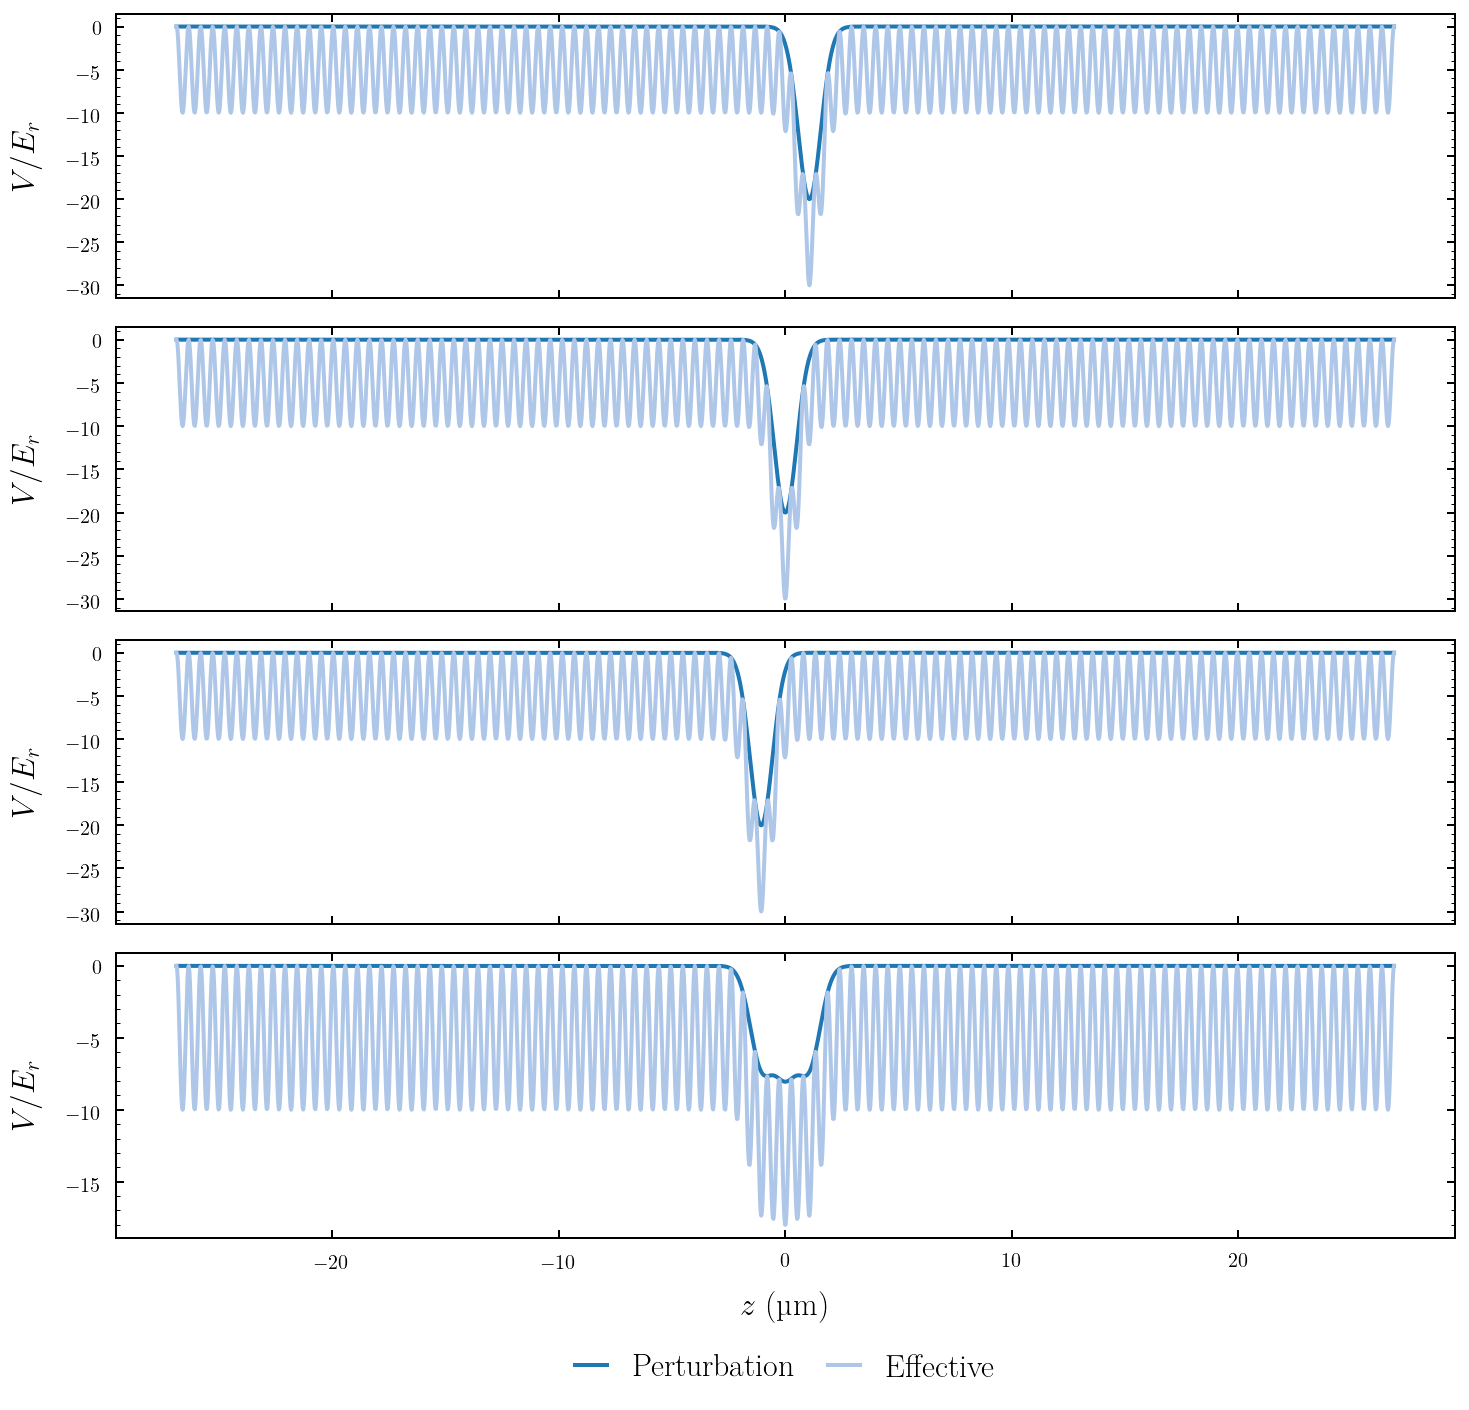

In [24]:
fig, axes = plt.subplots(nrows=4, figsize=(12, 10), sharex=True)

axes[0].plot(z / 1e-6, V_box1, label='Perturbation', color=cmap.colors[0])
axes[0].plot(z / 1e-6, V_lat + V_box1, label='Effective', color=cmap.colors[1])
axes[0].set_ylabel('$V/E_r$')

axes[1].plot(z / 1e-6, V_box2, label='Perturbation', color=cmap.colors[0])
axes[1].plot(z / 1e-6, V_lat + V_box2, label='Effective', color=cmap.colors[1])
axes[1].set_ylabel('$V/E_r$')

axes[2].plot(z / 1e-6, V_box3, label='Perturbation', color=cmap.colors[0])
axes[2].plot(z / 1e-6, V_lat + V_box3, label='Effective', color=cmap.colors[1])
axes[2].set_ylabel('$V/E_r$')

axes[3].plot(z / 1e-6, V_box, label='Perturbation', color=cmap.colors[0])
axes[3].plot(z / 1e-6, V_lat + V_box, label='Effective', color=cmap.colors[1])
axes[3].set_xlabel('$z$ (\si{\micro\meter})')
axes[3].set_ylabel('$V/E_r$')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.subplots_adjust(hspace=.1, top=.98, bottom=.13)
plt.savefig(os.path.join(figdir, 'box.pdf'))
plt.savefig(os.path.join(figdir, 'box.pgf'))
plt.show()